# Test 53: The Siegel–Tukey rank sum dispersion test of two variances

## Objective

- I have 2 samples
- Do they come from two populations with the same variance?

## Assumptions

- The 2 populations have continuous frequency distributions 
- The sample sizes are not too small, e.g. n1 + n2 > 20

## Method

- Let's call your 2 samples $x$ and $y$

- Combine them and arrange in ascending order

- Assign ranks in the following way:
    - The lowest value is ranked 1.
    - The highest two values are ranked 2 and 3 (the largest value is given the value 2).
    - The lowest two unranked values are ranked 4 and 5 (the smallest value is given the value 4).
    - The highest two unranked values are ranked 6 and 7 (the largest value is given the value 6)
    - ...
    - This continues until either 1 value remains (if x+y is odd) or no values remain (if x+y is even)

- Let $n_1 \lt n_2$, and $R_1$ be the size of the sum of the smaller series

- The test statistic is

$$\begin{aligned}
    Z &= \frac{R_1 - \frac{n_1(n_1 + n_2 + 1)}{2} + \frac{1}{2}}{\sqrt{\frac{n_1 n_2 (n_1 + n_2 + 1)}{12}}}
\end{aligned}$$

- The test statistic is approximately standard normal, and the null hypothesis is rejected if the test statistic falls in the critical region

## Proof

In [100]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
def get_test_statistic():
    sample1 = [['sample1', x] for x in np.random.normal(10,5,300)]
    sample2 = [['sample2', x] for x in np.random.normal(10,5,300)]
    combined = sorted(sample1+sample2, key=lambda x: x[1])
    combined[0].append(1)

    ## If `combined` has an even length, after removing the first value, it becomes odd
    ## So you will always end up with 1 unranked value after the procedure
    ## For simplicity, remove the last value, which is at the midpoint of the array 
    ## excluding the value at index 0
    if len(combined) % 2 == 0:
        index_to_remove = (1 + len(combined))//2
    combined.pop(index_to_remove)

    ## The first half of the array, excluding array 0, will be pairs of consecutive numbers, with starting number separated by 4. (i.e. 2,3,6,7,10,11,...)
    ## The second half of the array will be pairs of consecutive numbers IN REVERSE, with starting number separated by 4. (i.e. ...13,12,9,8,5,4)
    count_total_pairs = len(combined) // 2
    asc_pair_count = count_total_pairs // 2 
    desc_pair_count = count_total_pairs - asc_pair_count

    desc_ranks = [
        rank
        for x in range(desc_pair_count) 
        for rank in (2 + (4*x), 2 + (4*x) + 1)
    ][::-1]
    asc_ranks = [
        rank
        for x in range(asc_pair_count) 
        for rank in (4 + (4*x), 4 + (4*x) + 1)
    ]
    ranks = asc_ranks + desc_ranks

    for i in range(1, len(combined)):
        combined[i].append(ranks[i-1])

    n1 = len(sample1)
    n2 = len(sample2)

    if n1 < n2:
        r1 = np.sum([x[2] for x in combined if x[0] == 'sample1'])
    elif n1 > n2:
        r1 = np.sum([x[2] for x in combined if x[0] == 'sample2'])
    else:
        r1 = np.sum([x[2] for x in combined if x[0] == 'sample1'])
        
    test_statistic = (
        (r1 - (n1 * (n1 + n2 + 1) / 2) + 0.5) /
        ((n1 * n2 * (n1 + n2 + 1))/12)**0.5
    )

    return test_statistic

get_test_statistic()

1.115121322076947

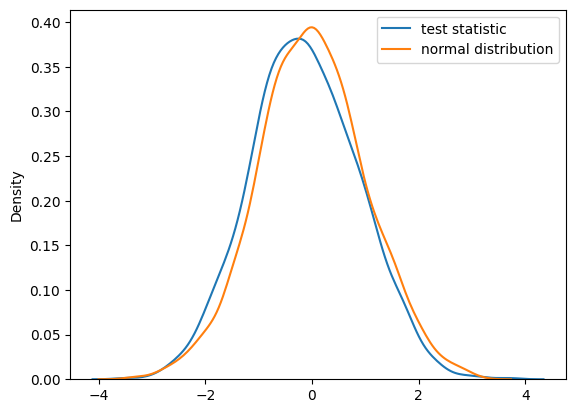

In [130]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_normal_distribution = np.random.normal(0,1, 3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_normal_distribution, label='normal distribution')
plt.legend()